# Import necessary modules
- Users have to run this cell at first

In [2]:
import AftFore as aft
%matplotlib inline

# Quick start
- This code demonstrates the parameter estimation and generates forecasts.
- For the users who use AftFroe for the first time, it is recommended to run this cell to check whether AftFore works properly.
- The AftFore module consists of two component, a parameter estimation function and a forecast function. A function 'aft.EstFore' gives the forecasts from a dataset.

Estimate()
MCMC
estimated processing time 2.87 minutes
Forecast()


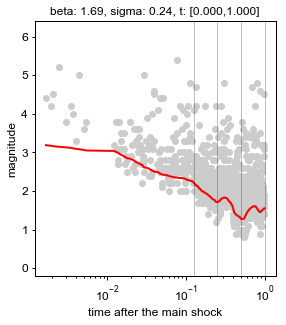

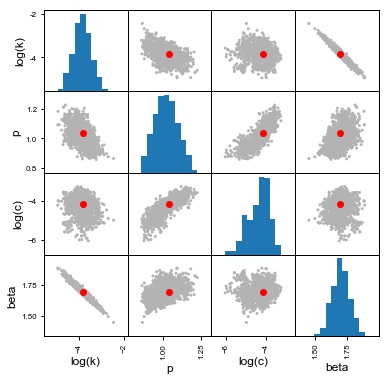

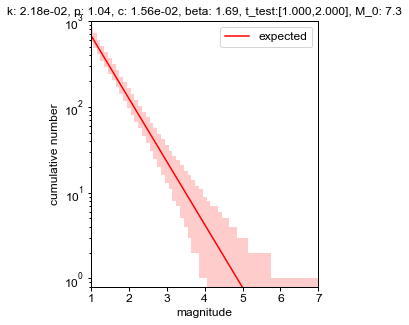

In [3]:
t_learn = [0.0, 1.0]            # The range of the learning period [day].
t_test  = [1.0, 2.0]            # The range of the testing period [day].
Data    = './AftFore/Kobe.txt'  # The path of the date file

aft.EstFore(Data,t_learn,t_test)

# Parameter estimation:
- The following codes demonstrates how to esimate the parameters.

### Basic method to estimate parameters
- A function "aft.Est" returns an estimation results 'param'.

Estimate()
MCMC
estimated processing time 2.64 minutes


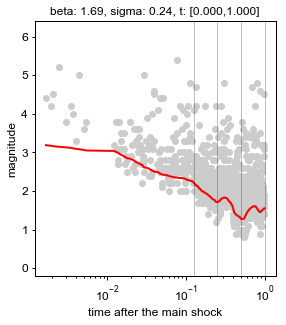

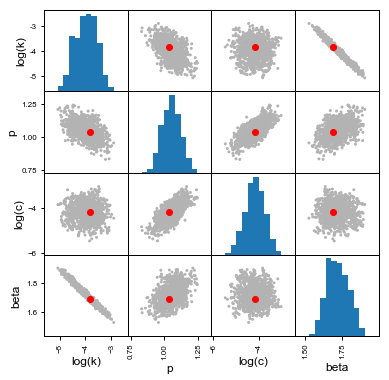

In [3]:
t_learn = [0.0, 1.0]            # The range of the learning period [day].
Data    = './AftFore/Kobe.txt'  # The path of the date file

param = aft.Est(Data,t_learn)

### Loading the parmeter values from a file
- The function "aft.Est" also saves the estimation results in a file 'param.pkl'
- The below code demonstrates how to load the parameter valuds from the file.

In [4]:
import pickle
param = pickle.load(open('param.pkl','rb'))

### Printing the estimated parameter values and estimation uncertainty
- The best parameter values are stored in "param['para']".
- The parmeter sets sampled from the posterior distribution are stored in "param['para_mcmc']".

In [5]:
print("-------------------------------MAP parameters:")
print( param["para"][["k","p","c","beta"]] ) # the best parameters 
print ("\n")

print("-------------------------------estimation uncertainty:")
print( param["para_mcmc"][["k","p","c","beta"]].std() )  # estimation uncertainty
print ("\n")

-------------------------------MAP parameters:
k       0.021769
p       1.037202
c       0.015635
beta    1.691913
Name: 0, dtype: float64


-------------------------------estimation uncertainty:
k       0.009386
p       0.075623
c       0.006916
beta    0.067184
dtype: float64




# Generating the forecast:
- The following codes demonstrates how to generate forecasts from the estimated paramters 'param'.

### Basic method to generate forecasts.
A function "aft.Fore" generate several files describing the forecasts.

Forecast()


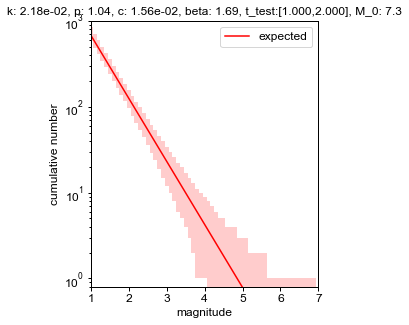

In [6]:
t_test  = [1.0, 2.0]            # The range of the testing period [day].

aft.Fore(param,t_test)

### Compareing the forecast with the observed data
- You can plot the observed data in the test period with the forecasts. 

Forecast()


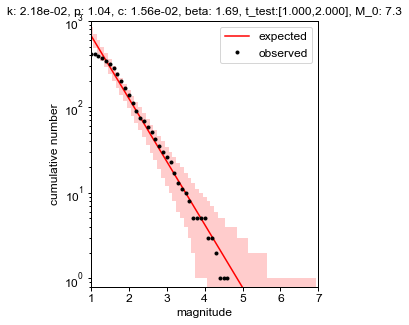

In [7]:
t_test  = [1.0, 2.0]             # The range of the testing period [day].
Data_test = './AftFore/Kobe.txt' # The path of the data file including the data in the testing period

aft.Fore(param,t_test,Data_test=Data_test)

### Showing the forecast in a N-T plot [experimental]
- A function "aft.NT_plot()" shows the cumulative number of aftershocks with *M > mag_t* in the time interval *[0, t_test_end]*, compared with the forecast.

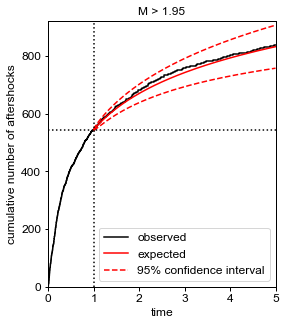

In [8]:
mag_th   = 1.95               # The magnitude threshold M_th fore forecasting
t_test_end  = 5.0             # The end of the forecasting period [day]. The time interval [0, t_test_end]
Data    = './AftFore/Kobe.txt'  # The path of the date file
aft.NT_plot(Data,t_test_end,mag_th,param)